In [9]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------


# Imports

In [10]:
%matplotlib widget
import neighbor_core_20240806 as nc
from neighbor_core_20240806 import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Initialize a cluster and view it

In [20]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

# view it

In [33]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Plot histogram

In [4]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

# Get CN reports and save to excel

In [5]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False);
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0
32 atoms have CN of 1
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2
18 atoms have CN of 4
16 atoms have CN of 6
6 atoms have CN of 8
-- Tolerance: 0.1 

-- Distance: 3.389999705849734
-- Average CN: 1.2727272727272727
-- Info: 
32 atoms have CN of 1
12 atoms have CN of 2
-- Tolerance: 0.1 

-- Distance: 3.597255223529738
-- Average CN: 0.9090909090909091
-- Info: 
14 atoms have CN of 0
20 atoms have CN of 1
10 atoms have CN of 2
-- Tolerance: 0.1 

-- Distance: 4.328013369355418
-- Average CN: 1.5
-- Info: 
28 atoms have CN of 1
10 atoms have CN of 2
6 atoms have CN of 3
-- Tolerance: 0.1 

-- Distance: 4.9524037543295805
-- Average CN: 3.272727272727273
-- Info: 
14 atoms have CN of 2
8 atoms have CN of 3
20 atoms have CN of 4
2 atoms have CN of 6
-- Tolerance: 0.1 

Bond Type: Pb-Pb
-- Distance: 3.38999991

# remove undercoordinated atoms

In [6]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_threshold=7, bond_range=4, self_apply=True)
cluster.view_xyz(label=True, show_symbol=True)

CN atom not provided. Using O as the CN atom.
Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False);
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0
32 atoms have CN of 1
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2
18 atoms have CN of 4
16 atoms have CN of 6
6 atoms have CN of 8
-- Tolerance: 0.1 

-- Distance: 3.389999705849734
-- Average CN: 1.2727272727272727
-- Info: 
32 atoms have CN of 1
12 atoms have CN of 2
-- Tolerance: 0.1 

-- Distance: 3.597255223529738
-- Average CN: 0.9090909090909091
-- Info: 
14 atoms have CN of 0
20 atoms have CN of 1
10 atoms have CN of 2
-- Tolerance: 0.1 

-- Distance: 4.328013369355418
-- Average CN: 1.5
-- Info: 
28 atoms have CN of 1
10 atoms have CN of 2
6 atoms have CN of 3
-- Tolerance: 0.1 

-- Distance: 4.9524037543295805
-- Average CN: 3.272727272727273
-- Info: 
14 atoms have CN of 2
8 atoms have CN of 3
20 atoms have CN of 4
2 atoms have CN of 6
-- Tolerance: 0.1 

Bond Type: Pb-Pb
-- Distance: 3.38999991

# Example 2

In [8]:
Pt_CNs_all = []
Pt_bondlengths_all = []
num_atoms = []
sizes_all = []

Pt_cluster = ClusterNeighbor()
Pt_cluster.load_xyz(path = "test_Pt/Ptfoil_243678.cif")

for i in range(2, 15):
    expanded_cluster = Pt_cluster.expand_cif((i, i, i), self_apply=False)
    Pt_new_cluster = ClusterNeighbor()
    Pt_new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    Pt_new_cluster.shrink_cluster_size(new_radius=Pt_new_cluster.get_cluster_size()*0.7, self_apply=True)
    Pt_new_cluster.view_xyz(label=False)
    Pt_new_cluster.get_CN_summary_all(tolerance=0.1, bond_range=3, printit=True)
    # Pt_new_cluster.atoms.set_pbc(False)
    
    average_bd = list(Pt_new_cluster.CN_summary['Pt-Pt'].keys())[0]
    average_cn = Pt_new_cluster.CN_summary['Pt-Pt'][average_bd]['average_CN'] 
    Pt_CNs_all.append(average_cn)
    Pt_bondlengths_all.append(average_bd)
    num_atoms.append(len(Pt_new_cluster.atoms))
    sizes_all.append(Pt_new_cluster.get_cluster_size())
print(Pt_CNs_all)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 9.000
Coordination numbers around 2.774 Å for Pt-Pt
4 atoms have CN of 3


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 7.909
Coordination numbers around 2.774 Å for Pt-Pt
4 atoms have CN of 3
24 atoms have CN of 7
12 atoms have CN of 10
4 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 9.600
Coordination numbers around 2.774 Å for Pt-Pt
12 atoms have CN of 5
12 atoms have CN of 7
24 atoms have CN of 8
12 atoms have CN of 9
24 atoms have CN of 10
12 atoms have CN of 11
44 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 10.346
Coordination numbers around 2.774 Å for Pt-Pt
12 atoms have CN of 5
24 atoms have CN of 7
24 atoms have CN of 8
40 atoms have CN of 9
36 atoms have CN of 10
24 atoms have CN of 11
152 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 10.588
Coordination numbers around 2.774 Å for Pt-Pt
12 atoms have CN of 5
24 atoms have CN of 6
72 atoms have CN of 8
52 atoms have CN of 9
24 atoms have CN of 10
48 atoms have CN of 11
312 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 10.939
Coordination numbers around 2.774 Å for Pt-Pt
24 atoms have CN of 6
60 atoms have CN of 7
24 atoms have CN of 8
96 atoms have CN of 9
36 atoms have CN of 10
72 atoms have CN of 11
604 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.148
Coordination numbers around 2.774 Å for Pt-Pt
24 atoms have CN of 6
72 atoms have CN of 7
24 atoms have CN of 8
148 atoms have CN of 9
48 atoms have CN of 10
84 atoms have CN of 11
1036 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.194
Coordination numbers around 2.774 Å for Pt-Pt
72 atoms have CN of 6
24 atoms have CN of 7
72 atoms have CN of 8
208 atoms have CN of 9
36 atoms have CN of 10
108 atoms have CN of 11
1520 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.326
Coordination numbers around 2.774 Å for Pt-Pt
4 atoms have CN of 3
24 atoms have CN of 6
144 atoms have CN of 7
24 atoms have CN of 8
216 atoms have CN of 9
60 atoms have CN of 10
156 atoms have CN of 11
2220 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.383
Coordination numbers around 2.774 Å for Pt-Pt
24 atoms have CN of 5
48 atoms have CN of 6
108 atoms have CN of 7
96 atoms have CN of 8
192 atoms have CN of 9
120 atoms have CN of 10
192 atoms have CN of 11
3088 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.447
Coordination numbers around 2.774 Å for Pt-Pt
96 atoms have CN of 6
120 atoms have CN of 7
96 atoms have CN of 8
256 atoms have CN of 9
144 atoms have CN of 10
216 atoms have CN of 11
4192 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.481
Coordination numbers around 2.774 Å for Pt-Pt
36 atoms have CN of 5
96 atoms have CN of 6
72 atoms have CN of 7
192 atoms have CN of 8
280 atoms have CN of 9
168 atoms have CN of 10
240 atoms have CN of 11
5408 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 11.549
Coordination numbers around 2.774 Å for Pt-Pt
72 atoms have CN of 6
252 atoms have CN of 7
72 atoms have CN of 8
384 atoms have CN of 9
120 atoms have CN of 10
324 atoms have CN of 11
6972 atoms have CN of 12
[3.0, 7.909090909090909, 9.6, 10.346153846153847, 10.588235294117647, 10.93886462882096, 11.147632311977716, 11.194117647058823, 11.325842696629213, 11.382626680455015, 11.446875, 11.480591497227357, 11.549048316251831]


# in terms of diameter

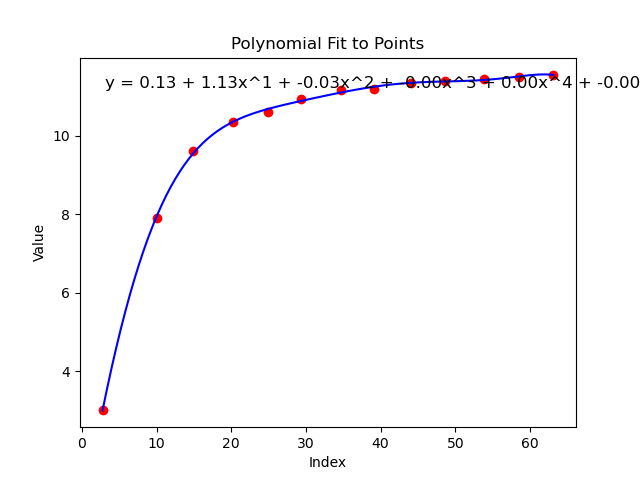

In [13]:
from neighbor_core_20240806 import fit_polynomial, fit_logarithmic
polynomial = fit_polynomial(np.array(sizes_all) * 2, Pt_CNs_all, 7)
# polynomial = fit_polynomial(num_atoms, Pt_CNs_all, 2)

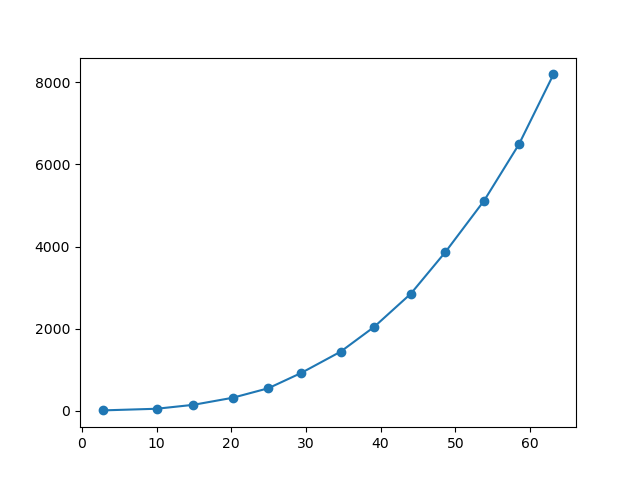

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.array(sizes_all) * 2, num_atoms, label='data')
plt.plot(np.array(sizes_all) * 2, num_atoms, label='data')